## Probabilistic Learning on Manifolds (Simple example in 20 dimensions)

In this example, raw invented data is used as sample input. This is just a user guide to see how the package and algorithm work and see their possible applications.

The input sample included 300 data points and each features a unique vector of some independent variables and some other linearly related variables. The goal is to use PLoM learn the data structure and generate more samples whose key statistics (i.e., mean and covariance) are consistent with the input sample.

### Import python modules

In [1]:
import numpy as np
import random
import time
from math import pi
import pandas as pd
from ctypes import *
%matplotlib notebook
import matplotlib.pyplot as plt
import sys

### Import PLoM modules

In [2]:
sys.path.insert(1, '../../')
from PLoM import *

### Load Data
Data are loaded via a comma-separate value (csv) file. The first row contains column names for all the variables. The following rows are input sample data. Users are expected to specif the csv filename.

2021-10-20 00:16:49.529743  RUNNING-MSG --NEW LOG STARTING FROM THIS LINE-- 
2021-10-20 00:16:49.530345  RUNNING-MSG PLoM: Running directory /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints initialized. 
2021-10-20 00:16:49.584520  RUNNING-MSG PLoM: database server initialized. 
2021-10-20 00:16:49.585251  RUNNING-MSG PLoM: visualization folder /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints/FigOut initialized. 
2021-10-20 00:16:49.591230  RUNNING-MSG PLoM.load_data: loaded data size = (300, 20). 
2021-10-20 00:16:49.622624  RUNNING-MSG PLoM.initialize_data: current X0 size = (300, 20). 
2021-10-20 00:16:49.623092  RUNNING-MSG PLoM.initialize_data: X0 and X0_size saved to database. 


<IPython.core.display.Javascript object>


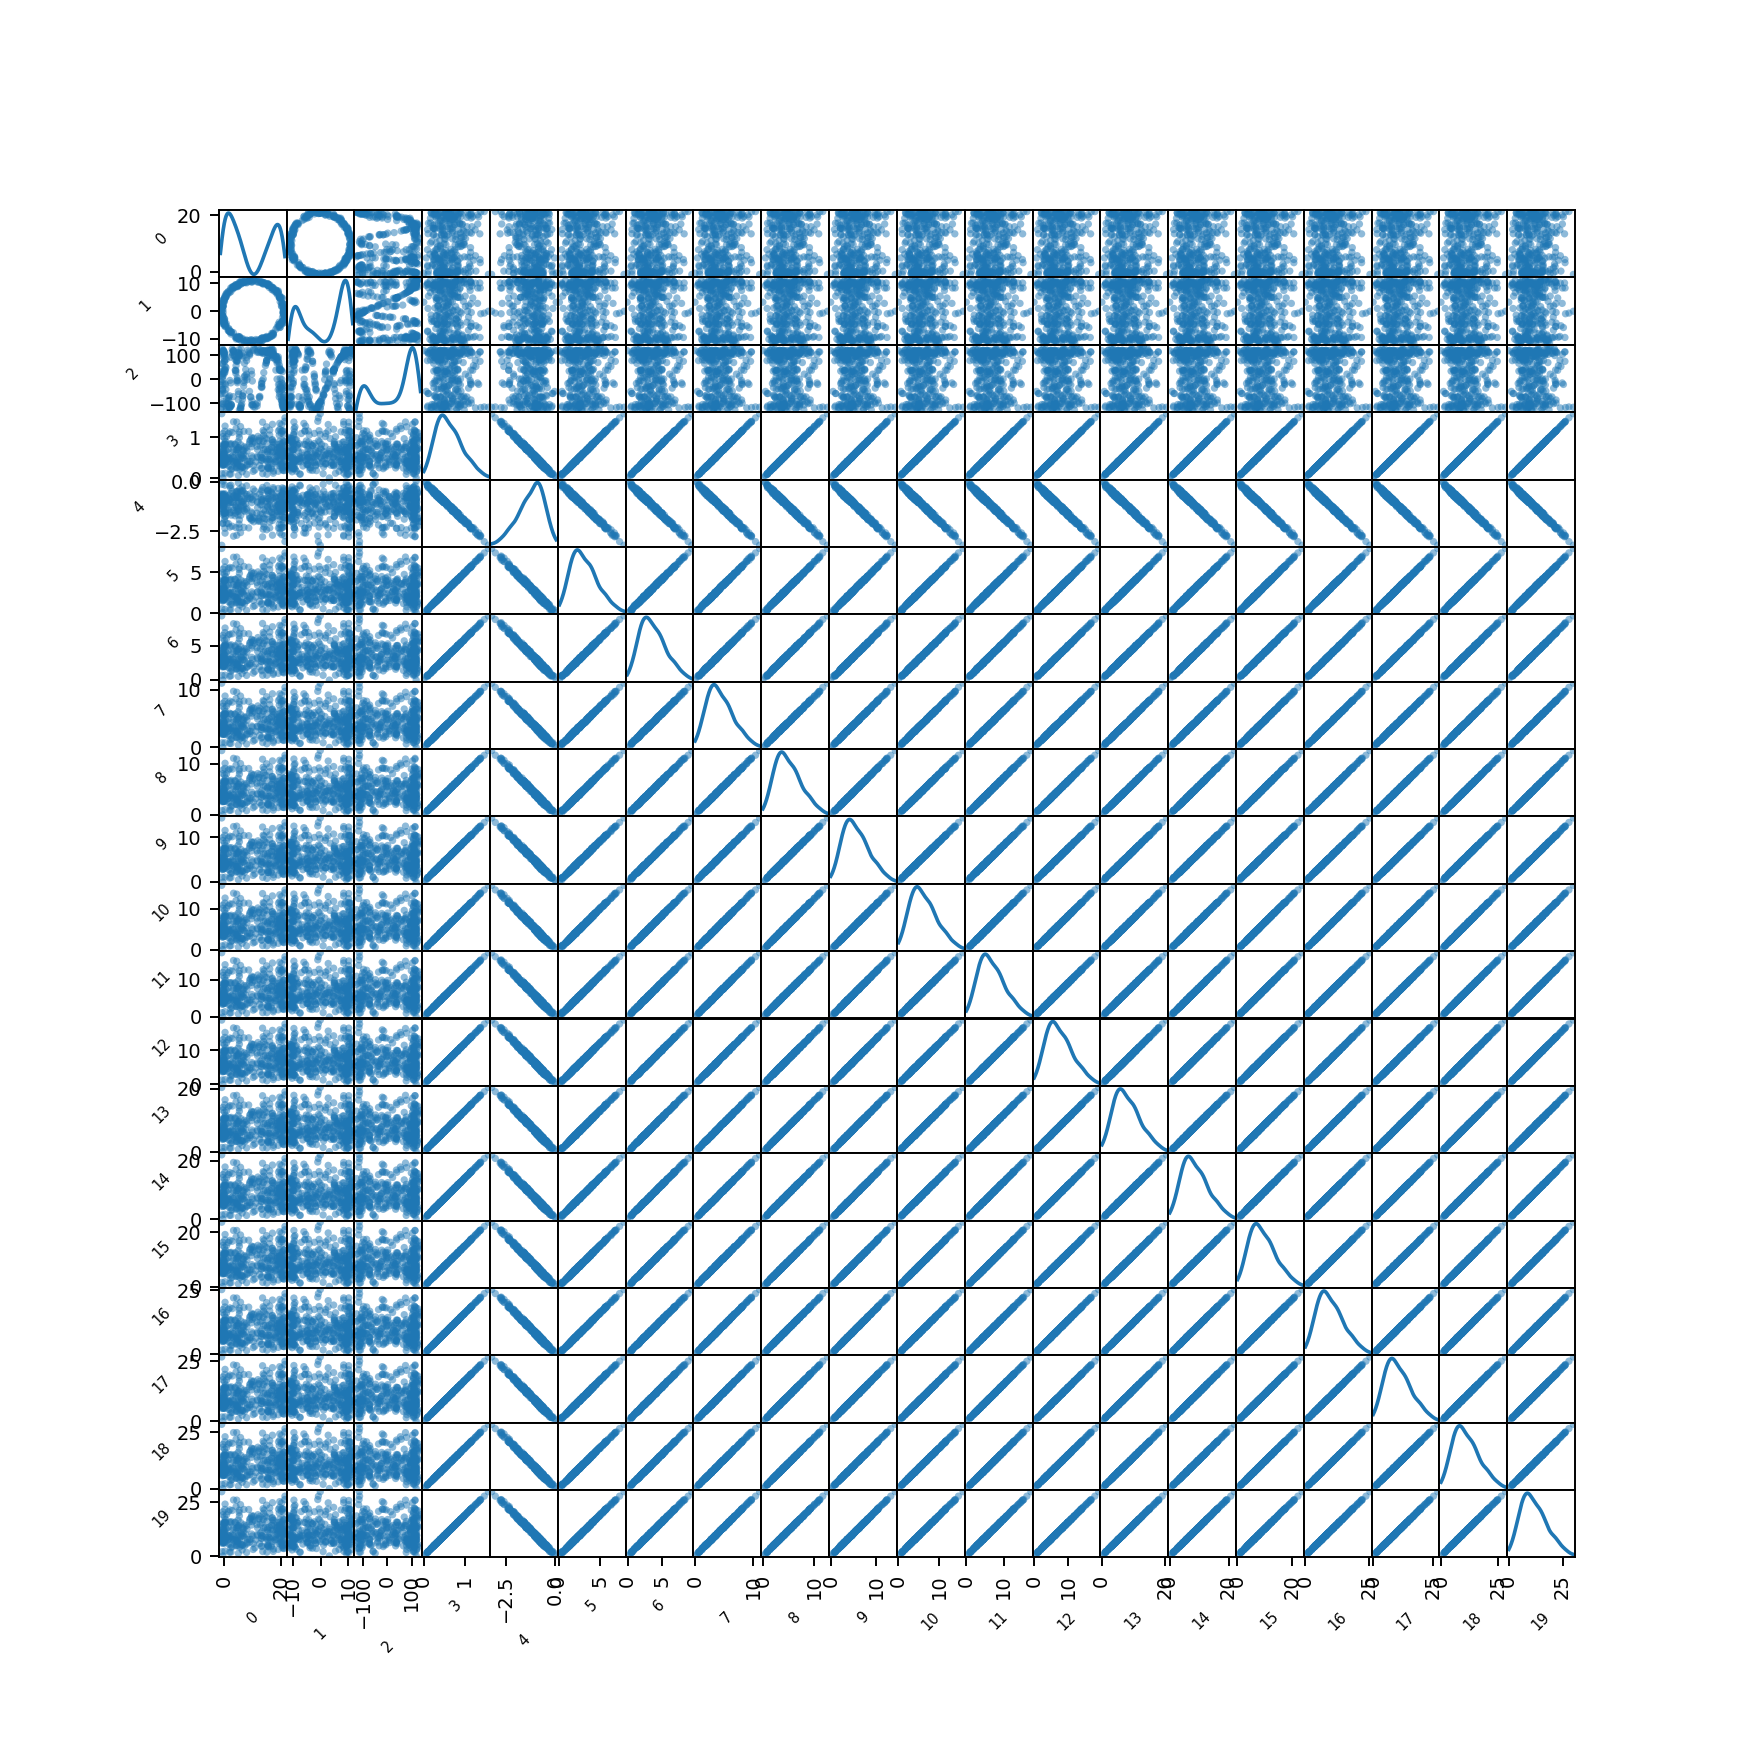

2021-10-20 00:17:00.002820  RUNNING-MSG PLoM: ScatterMatrix_X0.png saved in /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints/FigOut. 
2021-10-20 00:17:00.003414  WARNING-MSG PLoM.add_constraints: no user-defined constraint - please use add_constraints(constraints_file=X) to add new constraints if any. 
2021-10-20 00:17:00.003760  RUNNING-MSG PLoM: using ConfigTasks(task_list = FULL_TASK_LIST) to schedule a run. 
2021-10-20 00:17:00.004130  RUNNING-MSG PLoM: using RunAlgorithm(n_mc=n_mc,epsilon_pca=epsilon_pca,epsilon_kde) to run simulations. 


In [3]:
# Filename
filename = './data/sampleX.csv'
model = PLoM(model_name='Example0_constraints', data=filename, col_header=True, plot_tag=True)

In [4]:
model.add_constraints(constraints_file='./data/constraints_example20D.py')

2021-10-20 00:17:01.074240  RUNNING-MSG PLoM.add_constraints: constraints added. 


0

### Configuring tasks
Please specify tasks to run - the list of tasks can be run in sqeunce or invidivdual tasks can be run separately.

In [5]:
tasks = ['DataNormalization','RunPCA','RunKDE','ISDEGeneration']

### Step 0: Scaling the data

In [6]:
# Configure the task
model.ConfigTasks(['DataNormalization'])
# Launch the run
model.RunAlgorithm()

2021-10-20 00:17:01.207367  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: DataNormalization. 
2021-10-20 00:17:01.208971  RUNNING-MSG PLoM.RunAlgorithm: data normalization completed. 
2021-10-20 00:17:01.249129  RUNNING-MSG PLoM.RunAlgorithm: X_range, X_min, X_scaled and X_scaled_mean saved. 
2021-10-20 00:17:01.288862  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) DataNormalization done. 


### Step 1: Principal Component Analysis (PCA)

In [7]:
# Tolerance for truncating principal components
tol_pca = 1e-9
# Configure the task
model.ConfigTasks(['RunPCA'])
# Launch the run
model.RunAlgorithm(epsilon_pca=tol_pca,runDiffMaps=False)

2021-10-20 00:17:01.482637  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunPCA. 
2021-10-20 00:17:01.489440  RUNNING-MSG PLoM.RunPCA: considered number of PCA components = 20 


<IPython.core.display.Javascript object>

2021-10-20 00:17:02.685476  RUNNING-MSG PLoM: PCA_CovarianceMatrix.png saved in /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints/FigOut. 
2021-10-20 00:17:02.686054  RUNNING-MSG PLoM.RunAlgorithm: PCA completed. 
2021-10-20 00:17:02.727824  RUNNING-MSG PLoM.RunAlgorithm: X_PCA, EigenValue_PCA and EigenVector_PCA saved. 
2021-10-20 00:17:02.783038  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunPCA done. 


### Step 2: Kernel Density Estimation (KDE)

In this step there is an optional argument for the RunAlgorithm process that involves the diffusion maps basis. This step can both be run or not, anddepending on the requirements it can be neglected. It can be noted that the default value of *runDiffMaps* is *True*.

In [8]:
# Smoothing parameter in the KDE
sp = 16
# Configure the task
model.ConfigTasks(['RunKDE'])

# Launch the run
model.RunAlgorithm(epsilon_kde=sp)

2021-10-20 00:17:03.053926  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunKDE. 
2021-10-20 00:17:03.673025  RUNNING-MSG PLoM.RunAlgorithm: kernel density estimation completed. 
2021-10-20 00:17:03.727920  RUNNING-MSG PLoM.RunAlgorithm: KDE, X_KDE and EigenValues_KDE saved. 


<IPython.core.display.Javascript object>

2021-10-20 00:17:04.465954  RUNNING-MSG PLoM: KDE_EigenValue.png saved in /mnt/c/Users/kuans/Program/SimCenter/PLoM/RunDir/Example0_constraints/FigOut. 
2021-10-20 00:17:04.466549  RUNNING-MSG PLoM.RunAlgorithm: diffusion maps completed. 
2021-10-20 00:17:04.511618  RUNNING-MSG PLoM.RunAlgorithm: KDE_g, KDE_m, KDE_a and KDE_Z saved. 
2021-10-20 00:17:04.727089  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunKDE done. 


### Step 3: Create the generator

In [ ]:
# Extra parameters for ISDE generation
new_sample_num_ratio = 10
tol_PCA2 = 1e-5
# Configure the task
model.ConfigTasks(['ISDEGeneration'])
# Launch the run
model.RunAlgorithm(n_mc = new_sample_num_ratio, tol_PCA2 = tol_PCA2)

2021-10-20 00:17:05.174233  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: ISDEGeneration. 
2021-10-20 00:17:05.187377  RUNNING-MSG PLoM.ISDEGeneration: running iteration 1. 
delta t:  0.18616116359281468
2021-10-20 00:17:10.870569  RUNNING-MSG PLoM.ISDEGeneration: running iteration 2. 
delta t:  0.18616116359281468
2021-10-20 00:17:16.513860  RUNNING-MSG PLoM.ISDEGeneration: running iteration 3. 
delta t:  0.18616116359281468
2021-10-20 00:17:22.252527  RUNNING-MSG PLoM.ISDEGeneration: running iteration 4. 
delta t:  0.18616116359281468
2021-10-20 00:17:27.912710  RUNNING-MSG PLoM.ISDEGeneration: running iteration 5. 
delta t:  0.18616116359281468
2021-10-20 00:17:33.796312  RUNNING-MSG PLoM.ISDEGeneration: running iteration 6. 
delta t:  0.18616116359281468
2021-10-20 00:17:41.651302  RUNNING-MSG PLoM.ISDEGeneration: running iteration 7. 
delta t:  0.18616116359281468
2021-10-20 00:17:47.451380  RUNNING-MSG PLoM.ISDEGeneration: running iteration 8. 
delta t:

### Step 4: Exporting data

In [ ]:
# Available data list
model.export_results()

In [ ]:
# Pick up the original and new realizations, X0 and X_new
model.export_results(data_list=['/X0','/X_new'], file_format_list=['csv','csv'])

### Post-processing
We would like to check the basic statistics of the input sample (i.e., MSA) and the generated new realizations by PLoM. The key metrics include the median, standard deviation, and correlation coefficient matrix of different structural responses.

In [ ]:
# Load results

#write realtive paths

df_initial = pd.read_csv('../../RunDir/Example0_constraints/DataOut/X0.csv')
df_plom = pd.read_csv('../../RunDir/Example0_constraints/DataOut/X_new.csv')
print(df_msa.head)
print(df_plom.head)

In [ ]:
#plot of the first two variables
import matplotlib.patches as mpatches
plt.figure()
plt.plot(df_plom.iloc[:,1].to_numpy(), df_plom.iloc[:,2].to_numpy(), 'rx')
plt.plot(df_initial.iloc[:,1].to_numpy(), df_initial.iloc[:,2].to_numpy(), 'bo')
plt.xlabel('x')
plt.ylabel('y')
red_patch = mpatches.Patch(color='red', label='new X')
blue_patch = mpatches.Patch(color='blue', label='X')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

In [ ]:
import matplotlib.patches as mpatches
plt.figure()
plt.xlabel('x1')
plt.subplot(2,1,1)
plt.hist(df_plom.iloc[:,1].to_numpy(), bins = 100, color = 'red')
plt.subplot(2,1,2)
plt.hist(df_initial.iloc[:,1].to_numpy(), bins = 100, color = 'blue')
plt.title('Histogram')
red_patch = mpatches.Patch(color='red', label='X_c')
blue_patch = mpatches.Patch(color='blue', label='X')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

import matplotlib.patches as mpatches
plt.figure()
plt.xlabel('x2')
plt.subplot(2,1,1)
plt.hist(df_plom.iloc[:,2].to_numpy(), bins = 100, color = 'red')
plt.subplot(2,1,2)
plt.hist(df_initial.iloc[:,2].to_numpy(), bins = 100, color = 'blue')
plt.title('Histogram')
red_patch = mpatches.Patch(color='red', label='X new realizations')
blue_patch = mpatches.Patch(color='blue', label='X')
plt.legend(handles=[red_patch, blue_patch])
plt.show()